In [0]:
from google.colab import drive
drive.mount('/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /drive


In [0]:
import os
os.chdir('/drive/My Drive/deep learning/Hackathon_main/MAF')

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
sns.set_style('darkgrid')

The dataset consists of data collected from heavy Motors in everyday usage. The system in focus is the Motor Absolute Force (MAF) which generates
 forceful air that are utilized in various functions in a motor, such as braking and gear changes. The datasets' True class consists of component 
 failures for a specific component of the MAF system. The negative class consists of motors with failures for components not related to the MAF. 
 The data consists of a subset of all available data, selected by experts.  


In [0]:
train_data = pd.read_csv('maf_train.csv')

In [0]:
test_data = pd.read_csv('maf_test.csv')

In [0]:
train_data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,target
0,0,4,na,20,8,0,0,0,0,0,0,38,2504,2392,0,0,0,1666,0,446,0,0,0,20106,18030,10664,300,0,0,0,0,14,26,0,0,0,0,0,0,0,...,1754,42,94,0,0,0,0,0,0,0,0,128,0,0,1162,140,62,12,360,144,31676,14,0,0,0,0,0,3500,1268,24,16,28,24,26,48,0,0,0,0,False
1,1,192902,na,na,na,na,na,0,0,0,1036044,6044554,6243624,1845798,140682,2844,0,4657068,0,6502,na,303054,504304,15370854,14883810,2202728,642438,na,0,0,0,na,na,0,0,0,0,0,0,2102,...,9869694,na,na,na,na,na,na,na,na,na,na,58028,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,4749816,2191626,1539280,621668,809812,435744,650766,4301142,13692,0,na,na,False
2,2,42812,na,2130706432,264,0,0,0,0,0,0,1432,126512,1981406,923130,55826,0,1335442,0,0,0,0,0,2798082,2478240,577532,275700,0,0,0,0,160,76,0,0,0,0,0,33210,1186896,...,2469208,1964,90,0,0,0,0,0,0,0,0,21998,48806,16928,0,0,75156,11986,6138380,623008,0,0,0,0,2811960,869.2,908,664060,443826,346962,190796,447854,495106,452514,46858,326,0,0,0,False
3,3,8438,0,288,208,0,0,0,0,0,0,35656,411906,208880,5238,28,0,289424,0,0,0,790,3882,610196,506076,255038,80128,0,0,0,0,318,654,0,0,0,0,0,0,0,...,578148,948,978,0,0,0,0,0,0,0,0,6104,1886,688,1902018,210004,32816,5180,2061620,209102,711970,10788,0,0,0,1404.42,898,100118,203862,93918,29194,52906,43192,28096,108344,2078,0,0,0,False
4,4,6,0,0,0,0,0,0,0,0,0,16,2304,8214,1212,0,0,3098,0,0,0,0,0,10994,9260,15332,414,0,0,0,0,0,16,0,0,0,0,0,0,0,...,1806,40,52,0,0,0,0,0,0,0,0,116,0,0,0,0,20,8,620,74,0,0,0,0,0,101.46,32,10526,1076,36,10,28,24,16,30,0,0,0,0,False


In [0]:
test_data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169
0,0,21992,na,0,na,0,0,0,0,0,0,5140,894686,3094446,3562244,1005258,46028,4529264,0,0,0,0,0,8110056,7615742,1096512,429038,0,0,44822,0,0,0,0,0,0,0,0,20748,7752412,...,na,na,6322,226,0,0,0,0,0,0,0,0,38036,16128,3366,0,0,125662,25350,2306440,794568,0,0,0,0,0,1882.26,2134,6777340,940376,272368,92340,145288,131818,86808,62154,96058,3252,0,0
1,1,21384,na,na,na,na,na,0,0,0,72938,895660,346150,85970,698,0,0,429242,0,0,na,73348,99450,1186318,1184218,217000,62682,na,0,0,0,na,na,0,0,0,0,0,0,0,...,na,na,na,na,na,na,na,na,na,na,na,na,5642,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,401894,92212,68412,30306,70896,80616,133222,514760,9098,0,na,na
2,2,2300,na,620,560,0,0,0,0,0,0,242,38786,92512,11034,0,0,58910,0,0,0,0,0,134150,119290,29736,9370,0,0,0,0,360,78,0,0,0,0,0,4342,102986,...,32,128740,182,66,0,0,0,0,0,0,0,0,912,924,438,0,0,3208,794,712700,72178,0,0,0,0,1299900,269.58,140,17620,16100,14516,9308,27072,54904,2942,112,0,0,0,0
3,3,40588,na,2130706432,164,0,0,0,0,0,0,620,437006,1921128,721842,43640,0,1416262,0,142,0,0,0,2887006,2526312,508820,274142,0,0,0,0,576,146,0,0,0,0,0,211120,2198260,...,36,2506322,4432,156,0,0,0,0,0,0,0,0,25564,36684,12260,0,0,69526,16226,7329340,742542,0,0,0,0,587100,1515.54,1796,717306,527364,411056,218562,449834,344838,231628,119826,101478,2344,0,0
4,4,5268,na,420,340,0,0,0,0,0,0,242,71336,131044,58760,586,0,103718,0,0,0,0,0,223636,171150,98488,34106,0,0,0,0,156,86,0,0,0,0,0,3404,257358,...,0,156342,608,154,0,0,0,0,0,0,0,0,2570,440,146,0,0,5916,1170,64880,11510,138128,256,0,0,336560,380.7,414,125076,58518,13656,4000,9050,50890,754,22,2,0,0,0


In [0]:
train_data1=train_data.drop(['Unnamed: 0','target'],axis = 1)
test_data = test_data.drop('Unnamed: 0',axis = 1)

In [0]:
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 170 entries, 0 to 169
dtypes: int64(1), object(169)
memory usage: 77.8+ MB


In [0]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Columns: 170 entries, 0 to 169
dtypes: int64(1), object(169)
memory usage: 20.8+ MB


In [0]:
train_data1.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
165    0
166    0
167    0
168    0
169    0
Length: 170, dtype: int64

In [0]:
train_data1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169
0,4,na,20,8,0,0,0,0,0,0,38,2504,2392,0,0,0,1666,0,446,0,0,0,20106,18030,10664,300,0,0,0,0,14,26,0,0,0,0,0,0,0,0,...,0,1754,42,94,0,0,0,0,0,0,0,0,128,0,0,1162,140,62,12,360,144,31676,14,0,0,0,0,0,3500,1268,24,16,28,24,26,48,0,0,0,0
1,192902,na,na,na,na,na,0,0,0,1036044,6044554,6243624,1845798,140682,2844,0,4657068,0,6502,na,303054,504304,15370854,14883810,2202728,642438,na,0,0,0,na,na,0,0,0,0,0,0,2102,2102014,...,0,9869694,na,na,na,na,na,na,na,na,na,na,58028,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,4749816,2191626,1539280,621668,809812,435744,650766,4301142,13692,0,na,na
2,42812,na,2130706432,264,0,0,0,0,0,0,1432,126512,1981406,923130,55826,0,1335442,0,0,0,0,0,2798082,2478240,577532,275700,0,0,0,0,160,76,0,0,0,0,0,33210,1186896,423270,...,10,2469208,1964,90,0,0,0,0,0,0,0,0,21998,48806,16928,0,0,75156,11986,6138380,623008,0,0,0,0,2811960,869.2,908,664060,443826,346962,190796,447854,495106,452514,46858,326,0,0,0
3,8438,0,288,208,0,0,0,0,0,0,35656,411906,208880,5238,28,0,289424,0,0,0,790,3882,610196,506076,255038,80128,0,0,0,0,318,654,0,0,0,0,0,0,0,158738,...,0,578148,948,978,0,0,0,0,0,0,0,0,6104,1886,688,1902018,210004,32816,5180,2061620,209102,711970,10788,0,0,0,1404.42,898,100118,203862,93918,29194,52906,43192,28096,108344,2078,0,0,0
4,6,0,0,0,0,0,0,0,0,0,16,2304,8214,1212,0,0,3098,0,0,0,0,0,10994,9260,15332,414,0,0,0,0,0,16,0,0,0,0,0,0,0,8212,...,0,1806,40,52,0,0,0,0,0,0,0,0,116,0,0,0,0,20,8,620,74,0,0,0,0,0,101.46,32,10526,1076,36,10,28,24,16,30,0,0,0,0


In [0]:
train_data1.shape,test_data.shape

((60000, 170), (16000, 170))

In [0]:
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 170 entries, 0 to 169
dtypes: int64(1), object(169)
memory usage: 77.8+ MB


In [0]:
train_data1 = train_data1.replace('na','0')
#train_data.astype('float',inplace = True)


In [0]:
train_data1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169
0,4,0,20,8,0,0,0,0,0,0,38,2504,2392,0,0,0,1666,0,446,0,0,0,20106,18030,10664,300,0,0,0,0,14,26,0,0,0,0,0,0,0,0,...,0,1754,42,94,0,0,0,0,0,0,0,0,128,0,0,1162,140,62,12,360,144,31676,14,0,0,0,0,0,3500,1268,24,16,28,24,26,48,0,0,0,0
1,192902,0,0,0,0,0,0,0,0,1036044,6044554,6243624,1845798,140682,2844,0,4657068,0,6502,0,303054,504304,15370854,14883810,2202728,642438,0,0,0,0,0,0,0,0,0,0,0,0,2102,2102014,...,0,9869694,0,0,0,0,0,0,0,0,0,0,58028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4749816,2191626,1539280,621668,809812,435744,650766,4301142,13692,0,0,0
2,42812,0,2130706432,264,0,0,0,0,0,0,1432,126512,1981406,923130,55826,0,1335442,0,0,0,0,0,2798082,2478240,577532,275700,0,0,0,0,160,76,0,0,0,0,0,33210,1186896,423270,...,10,2469208,1964,90,0,0,0,0,0,0,0,0,21998,48806,16928,0,0,75156,11986,6138380,623008,0,0,0,0,2811960,869.2,908,664060,443826,346962,190796,447854,495106,452514,46858,326,0,0,0
3,8438,0,288,208,0,0,0,0,0,0,35656,411906,208880,5238,28,0,289424,0,0,0,790,3882,610196,506076,255038,80128,0,0,0,0,318,654,0,0,0,0,0,0,0,158738,...,0,578148,948,978,0,0,0,0,0,0,0,0,6104,1886,688,1902018,210004,32816,5180,2061620,209102,711970,10788,0,0,0,1404.42,898,100118,203862,93918,29194,52906,43192,28096,108344,2078,0,0,0
4,6,0,0,0,0,0,0,0,0,0,16,2304,8214,1212,0,0,3098,0,0,0,0,0,10994,9260,15332,414,0,0,0,0,0,16,0,0,0,0,0,0,0,8212,...,0,1806,40,52,0,0,0,0,0,0,0,0,116,0,0,0,0,20,8,620,74,0,0,0,0,0,101.46,32,10526,1076,36,10,28,24,16,30,0,0,0,0


In [0]:
test_data = test_data.replace('na','0')

In [0]:
for i in train_data1:
    train_data1[i] = pd.to_numeric(train_data1[i])

In [0]:
for i in test_data:
    test_data[i] = pd.to_numeric(test_data[i])

In [0]:
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 170 entries, 0 to 169
dtypes: float64(5), int64(165)
memory usage: 77.8 MB


In [0]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Columns: 170 entries, 0 to 169
dtypes: float64(5), int64(165)
memory usage: 20.8 MB


In [0]:
train_data1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169
0,4,0,20,8,0,0,0,0,0,0,38,2504,2392,0,0,0,1666,0,446,0,0,0,20106,18030,10664,300,0,0,0,0,14,26,0,0,0,0,0,0,0,0,...,0,1754,42,94,0,0,0,0,0,0,0,0,128,0,0,1162,140,62,12,360,144,31676,14,0,0,0,0.00,0,3500,1268,24,16,28,24,26,48,0,0,0,0
1,192902,0,0,0,0,0,0,0,0,1036044,6044554,6243624,1845798,140682,2844,0,4657068,0,6502,0,303054,504304,15370854,14883810,2202728,642438,0,0,0,0,0,0,0,0,0,0,0,0,2102,2102014,...,0,9869694,0,0,0,0,0,0,0,0,0,0,58028,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,4749816,2191626,1539280,621668,809812,435744,650766,4301142,13692,0,0,0
2,42812,0,2130706432,264,0,0,0,0,0,0,1432,126512,1981406,923130,55826,0,1335442,0,0,0,0,0,2798082,2478240,577532,275700,0,0,0,0,160,76,0,0,0,0,0,33210,1186896,423270,...,10,2469208,1964,90,0,0,0,0,0,0,0,0,21998,48806,16928,0,0,75156,11986,6138380,623008,0,0,0,0,2811960,869.20,908,664060,443826,346962,190796,447854,495106,452514,46858,326,0,0,0
3,8438,0,288,208,0,0,0,0,0,0,35656,411906,208880,5238,28,0,289424,0,0,0,790,3882,610196,506076,255038,80128,0,0,0,0,318,654,0,0,0,0,0,0,0,158738,...,0,578148,948,978,0,0,0,0,0,0,0,0,6104,1886,688,1902018,210004,32816,5180,2061620,209102,711970,10788,0,0,0,1404.42,898,100118,203862,93918,29194,52906,43192,28096,108344,2078,0,0,0
4,6,0,0,0,0,0,0,0,0,0,16,2304,8214,1212,0,0,3098,0,0,0,0,0,10994,9260,15332,414,0,0,0,0,0,16,0,0,0,0,0,0,0,8212,...,0,1806,40,52,0,0,0,0,0,0,0,0,116,0,0,0,0,20,8,620,74,0,0,0,0,0,101.46,32,10526,1076,36,10,28,24,16,30,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,61198,0,0,0,0,0,0,0,0,0,3528,218580,2676612,881950,5416,0,1935564,0,54,0,0,0,3397778,3004198,945612,312554,0,0,0,0,0,0,0,0,0,0,0,51028,1133196,2494126,...,0,0,2740,146,0,0,0,0,0,0,0,0,28516,61248,9072,0,0,137236,22348,6569880,983290,0,0,0,0,1734200,0.00,0,320890,758460,540078,268822,546872,497622,320156,178654,318332,36200,0,0
59996,1562,0,84,82,0,0,0,0,0,0,148,13220,86104,6064,0,0,37596,0,0,0,0,0,102070,90560,18348,7256,0,0,0,0,86,20,0,0,0,0,0,0,58188,47348,...,0,89688,174,40,0,0,0,0,0,0,0,0,702,170,50,0,0,1948,370,7760,776,0,0,0,0,561900,142.80,114,19310,15670,7158,2262,7686,52778,320,114,238,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0
59998,80198,0,958,912,0,0,0,0,0,0,17770,1731276,3415252,735870,77096,6770,2620304,0,0,0,0,0,5182438,4278560,1674796,736710,0,0,1364,0,550,176,0,0,0,0,0,225352,4513424,805920,...,36,5129026,3936,108,0,0,0,0,0,0,0,0,43346,72012,15404,0,0,182034,33786,1405780,306094,6336240,444,0,0,494330,2479.92,2648,1006992,1234036,913318,466808,955986,772568,510356,107034,16936,0,0,0


In [0]:
# train
from sklearn.preprocessing import StandardScaler
ss1= StandardScaler()
ss = ss1.fit_transform(train_data1)

In [0]:
# test
from sklearn.preprocessing import StandardScaler
ss1= StandardScaler()
ss1 = ss1.fit_transform(test_data)
x_test= pd.DataFrame(ss1)

In [0]:
x = pd.DataFrame(ss)
y = train_data['target']

In [0]:
# train
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(x)

array([[-3.17045471e+00,  2.46283903e-01,  1.10784767e+00, ...,
         1.07492228e-07,  4.65570946e-08, -2.10253239e-09],
       [ 7.10107548e+00,  2.43787970e+00,  5.63028817e-01, ...,
        -1.03977435e-06,  3.44154875e-07, -6.15852770e-08],
       [-5.68211814e-01, -2.61312982e-01,  6.65603491e-01, ...,
         3.24935168e-07,  8.90341026e-08,  1.41388978e-07],
       ...,
       [-3.24597213e+00,  3.08608504e-01,  1.32016975e+00, ...,
         4.22441439e-08,  2.74622050e-08, -2.51461836e-08],
       [ 2.01162437e+00, -6.63502330e-01, -4.70866405e-01, ...,
        -6.78276976e-07, -4.51177430e-08, -1.84147380e-08],
       [-3.22089825e+00,  3.12348840e-01,  1.32271302e+00, ...,
         3.85143699e-08,  3.70778044e-08, -2.58617436e-08]])

In [0]:
# test
from sklearn.decomposition import PCA
pca_test = PCA()
pca_test.fit_transform(x_test)

array([[ 2.42360938e+00, -1.49665352e+00, -7.25651418e-01, ...,
        -3.53265043e-07,  4.34961485e-07, -7.60244173e-08],
       [-2.30474245e+00,  1.17784337e+00, -4.10037351e-01, ...,
         8.91805307e-08,  1.76028807e-08, -7.23247588e-09],
       [-2.95837839e+00,  8.11185284e-01, -3.50802994e-01, ...,
        -8.45573005e-08, -7.54334506e-10, -5.26608711e-09],
       ...,
       [-2.75429374e+00,  8.09758311e-01, -2.29966901e-01, ...,
         4.61736198e-08,  1.16547377e-08, -6.16136244e-09],
       [-5.51998238e-01, -6.57763279e-01, -5.12371076e-01, ...,
        -3.30032935e-07,  7.59348839e-08, -6.41419450e-09],
       [-3.00097911e+00,  9.42660732e-01, -4.15906430e-01, ...,
        -7.42371394e-08,  2.62595816e-09, -5.88650764e-09]])

In [0]:
#train
var=pca.explained_variance_ratio_
#test
var_test = pca_test.explained_variance_

In [0]:
print(np.sum(np.round(pca.explained_variance_ratio_,decimals=4)*100))
print(np.sum(np.round(pca_test.explained_variance_ratio_,decimals=4)*100))

99.95000000000002
99.96000000000001


In [0]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_,decimals = 4)*100)
print(var1)
var_test=np.cumsum(np.round(pca_test.explained_variance_ratio_,decimals = 4)*100)
print(var_test)


[28.52 33.25 37.35 41.02 43.91 46.26 48.2  49.96 51.72 53.29 54.72 56.1
 57.32 58.48 59.61 60.69 61.71 62.72 63.69 64.66 65.59 66.5  67.4  68.27
 69.06 69.83 70.59 71.32 72.03 72.72 73.4  74.07 74.73 75.38 76.03 76.67
 77.28 77.88 78.47 79.06 79.65 80.22 80.79 81.35 81.91 82.46 83.   83.53
 84.05 84.54 85.02 85.48 85.93 86.37 86.79 87.21 87.62 88.03 88.43 88.82
 89.19 89.55 89.91 90.25 90.59 90.92 91.23 91.54 91.84 92.13 92.41 92.68
 92.94 93.2  93.45 93.69 93.92 94.15 94.37 94.58 94.79 94.99 95.19 95.39
 95.58 95.76 95.94 96.11 96.27 96.43 96.58 96.73 96.87 97.01 97.14 97.27
 97.39 97.5  97.61 97.72 97.82 97.92 98.02 98.12 98.22 98.32 98.41 98.5
 98.59 98.67 98.75 98.82 98.89 98.96 99.02 99.08 99.14 99.2  99.26 99.31
 99.36 99.4  99.44 99.48 99.52 99.56 99.59 99.62 99.65 99.68 99.7  99.72
 99.74 99.76 99.78 99.8  99.81 99.82 99.83 99.84 99.85 99.86 99.87 99.88
 99.89 99.9  99.91 99.92 99.93 99.94 99.95 99.95 99.95 99.95 99.95 99.95
 99.95 99.95 99.95 99.95 99.95 99.95 99.95 99.95 99.9

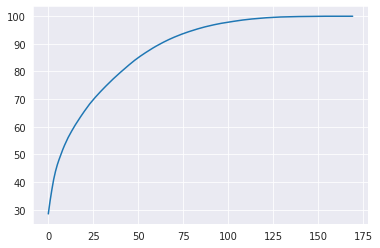

In [0]:
# train
plt.plot(var1)

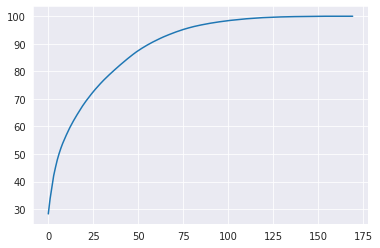

In [0]:
# test
plt.plot(var_test)

In [0]:
# train
pca.explained_variance_[:110].sum()

167.81888160070983

In [0]:
# test
pca_test.explained_variance_[:110].sum()

168.32051897377036

Text(110, 0.988, '110')

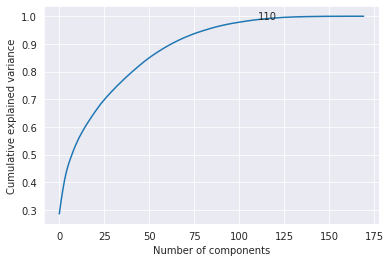

In [0]:
# Plotting relation between components and variance
# train
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.annotate('110',xy=(110,0.988))

Text(110, 0.988, '110')

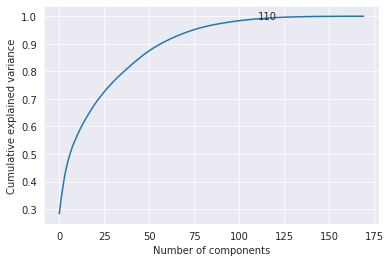

In [0]:
# Plotting relation between components and variance
# train
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.annotate('110',xy=(110,0.988))

In [0]:
# train
pca=PCA(n_components=110)
model1=pca.fit_transform(x)

In [0]:
# test
pca_test=PCA(n_components=110)
model_test=pca_test.fit_transform(x_test)

In [0]:
final_data = pd.DataFrame(model1)# train

In [0]:
final_test_data = pd.DataFrame(model_test)# train

In [0]:
final_data.shape,final_test_data.shape

((60000, 110), (16000, 110))

In [0]:
x_test_data = final_test_data.iloc[:,:]

In [0]:
x=final_data.iloc[:,:]

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.25,random_state = 101)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [0]:
lr = LogisticRegression()
nb = GaussianNB()
kn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svm  = SVC(kernel='rbf')

In [0]:
m_lr=lr.fit(X_train,Y_train)
m_nb=nb.fit(X_train,Y_train)
m_kn=kn.fit(X_train,Y_train)
m_dt =dt.fit(X_train,Y_train)
m_rf =rf.fit(X_train,Y_train)
m_svm = svm.fit(X_train,Y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
prediction_lr = m_lr.predict(X_test)
prediction_nb = m_nb.predict(X_test)
prediction_kn = m_kn.predict(X_test)
prediction_dt = m_dt.predict(X_test)
prediction_rf = m_rf.predict(X_test)
prediction_svm = m_svm.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
print(accuracy_score(Y_test,prediction_lr))
print(accuracy_score(Y_test,prediction_nb))
print(accuracy_score(Y_test,prediction_kn))
print(accuracy_score(Y_test,prediction_dt))
print(accuracy_score(Y_test,prediction_rf))
print(accuracy_score(Y_test,prediction_svm))

0.9892
0.9611333333333333
0.9885333333333334
0.9851333333333333
0.9909333333333333
0.9876


In [0]:
#test data
prediction_lr_test = m_lr.predict(x_test_data)
prediction_nb_test = m_nb.predict(x_test_data)
prediction_kn_test = m_kn.predict(x_test_data)
prediction_dt_test= m_dt.predict(x_test_data)
prediction_rf_test = m_rf.predict(x_test_data)
prediction_svm_test = m_svm.predict(x_test_data)

In [0]:
prediction_test_rf = pd.DataFrame(prediction_rf_test.astype('int'))


In [0]:
final_test_pred = prediction_test_rf.to_csv('rf.csv')

In [0]:
from sklearn.model_selection import StratifiedKFold,GridSearchCV

In [0]:
rf_clf = RandomForestClassifier()

parameter_grid = {'n_estimators' :[5,10,25,50,100],'criterion' : ['gini','entropy'],'max_features': [1,2,3,4]}

In [0]:
cross_validation = StratifiedKFold(n_splits = 10, shuffle= True , random_state= 101)

In [0]:
grid_search = GridSearchCV(rf_clf,param_grid= parameter_grid,cv = cross_validation)

In [0]:
import time

In [0]:
start = time.time()
grid_search.fit(X_train,Y_train)
end = time.time()
print(end-start)

3356.568933725357


In [0]:
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

Best parameters: {'criterion': 'gini', 'max_features': 3, 'n_estimators': 100}


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
#final
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,grid_search.predict(X_test)))

0.9896
